In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Iport liberies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
path =r"/content/drive/MyDrive/IBM_task/iotDataAnalysis/feeds(2).csv"
df = pd.read_csv(path)

In [ ]:
df

,created_at,entry_id,field1,field2,latitude,longitude,elevation,status
0,2024-12-08T18:41:17+00:00,1,0.0,NaN,NaN,NaN,NaN,NaN
1,2024-12-08T18:41:33+00:00,2,200.0,NaN,NaN,NaN,NaN,NaN
2,2024-12-08T18:42:09+00:00,3,NaN,200.0,NaN,NaN,NaN,NaN
3,2024-12-08T18:42:26+00:00,4,NaN,100.0,NaN,NaN,NaN,NaN
4,2024-12-08T19:20:47+00:00,5,0.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
791,2024-12-13T15:41:05+00:00,792,13.0,1.0,NaN,NaN,NaN,NaN
792,2024-12-13T15:41:25+00:00,793,13.0,1.0,NaN,NaN,NaN,NaN
793,2024-12-13T15:41:45+00:00,794,14.0,1.0,NaN,NaN,NaN,NaN
794,2024-12-13T15:42:05+00:00,795,14.0,1.0,NaN,NaN,NaN,NaN


In [ ]:
print(df.columns.tolist())

['created_at', 'entry_id', 'field1', 'field2', 'latitude', 'longitude', 'elevation', 'status']


In [ ]:
df = df.drop(['latitude', 'longitude', 'elevation', 'status'],axis=1)

In [ ]:
df

,created_at,entry_id,field1,field2
0,2024-12-08T18:41:17+00:00,1,0.0,NaN
1,2024-12-08T18:41:33+00:00,2,200.0,NaN
2,2024-12-08T18:42:09+00:00,3,NaN,200.0
3,2024-12-08T18:42:26+00:00,4,NaN,100.0
4,2024-12-08T19:20:47+00:00,5,0.0,1.0
...,...,...,...,...
791,2024-12-13T15:41:05+00:00,792,13.0,1.0
792,2024-12-13T15:41:25+00:00,793,13.0,1.0
793,2024-12-13T15:41:45+00:00,794,14.0,1.0
794,2024-12-13T15:42:05+00:00,795,14.0,1.0


In [ ]:
df.shape

(796, 4)

In [ ]:
df.dtypes.value_counts()

,count
float64,2
object,1
int64,1


In [ ]:
df.isnull().sum()

,0
created_at,0
entry_id,0
field1,3
field2,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  796 non-null    object 
 1   entry_id    796 non-null    int64  
 2   field1      793 non-null    float64
 3   field2      792 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 25.0+ KB


<Axes: >

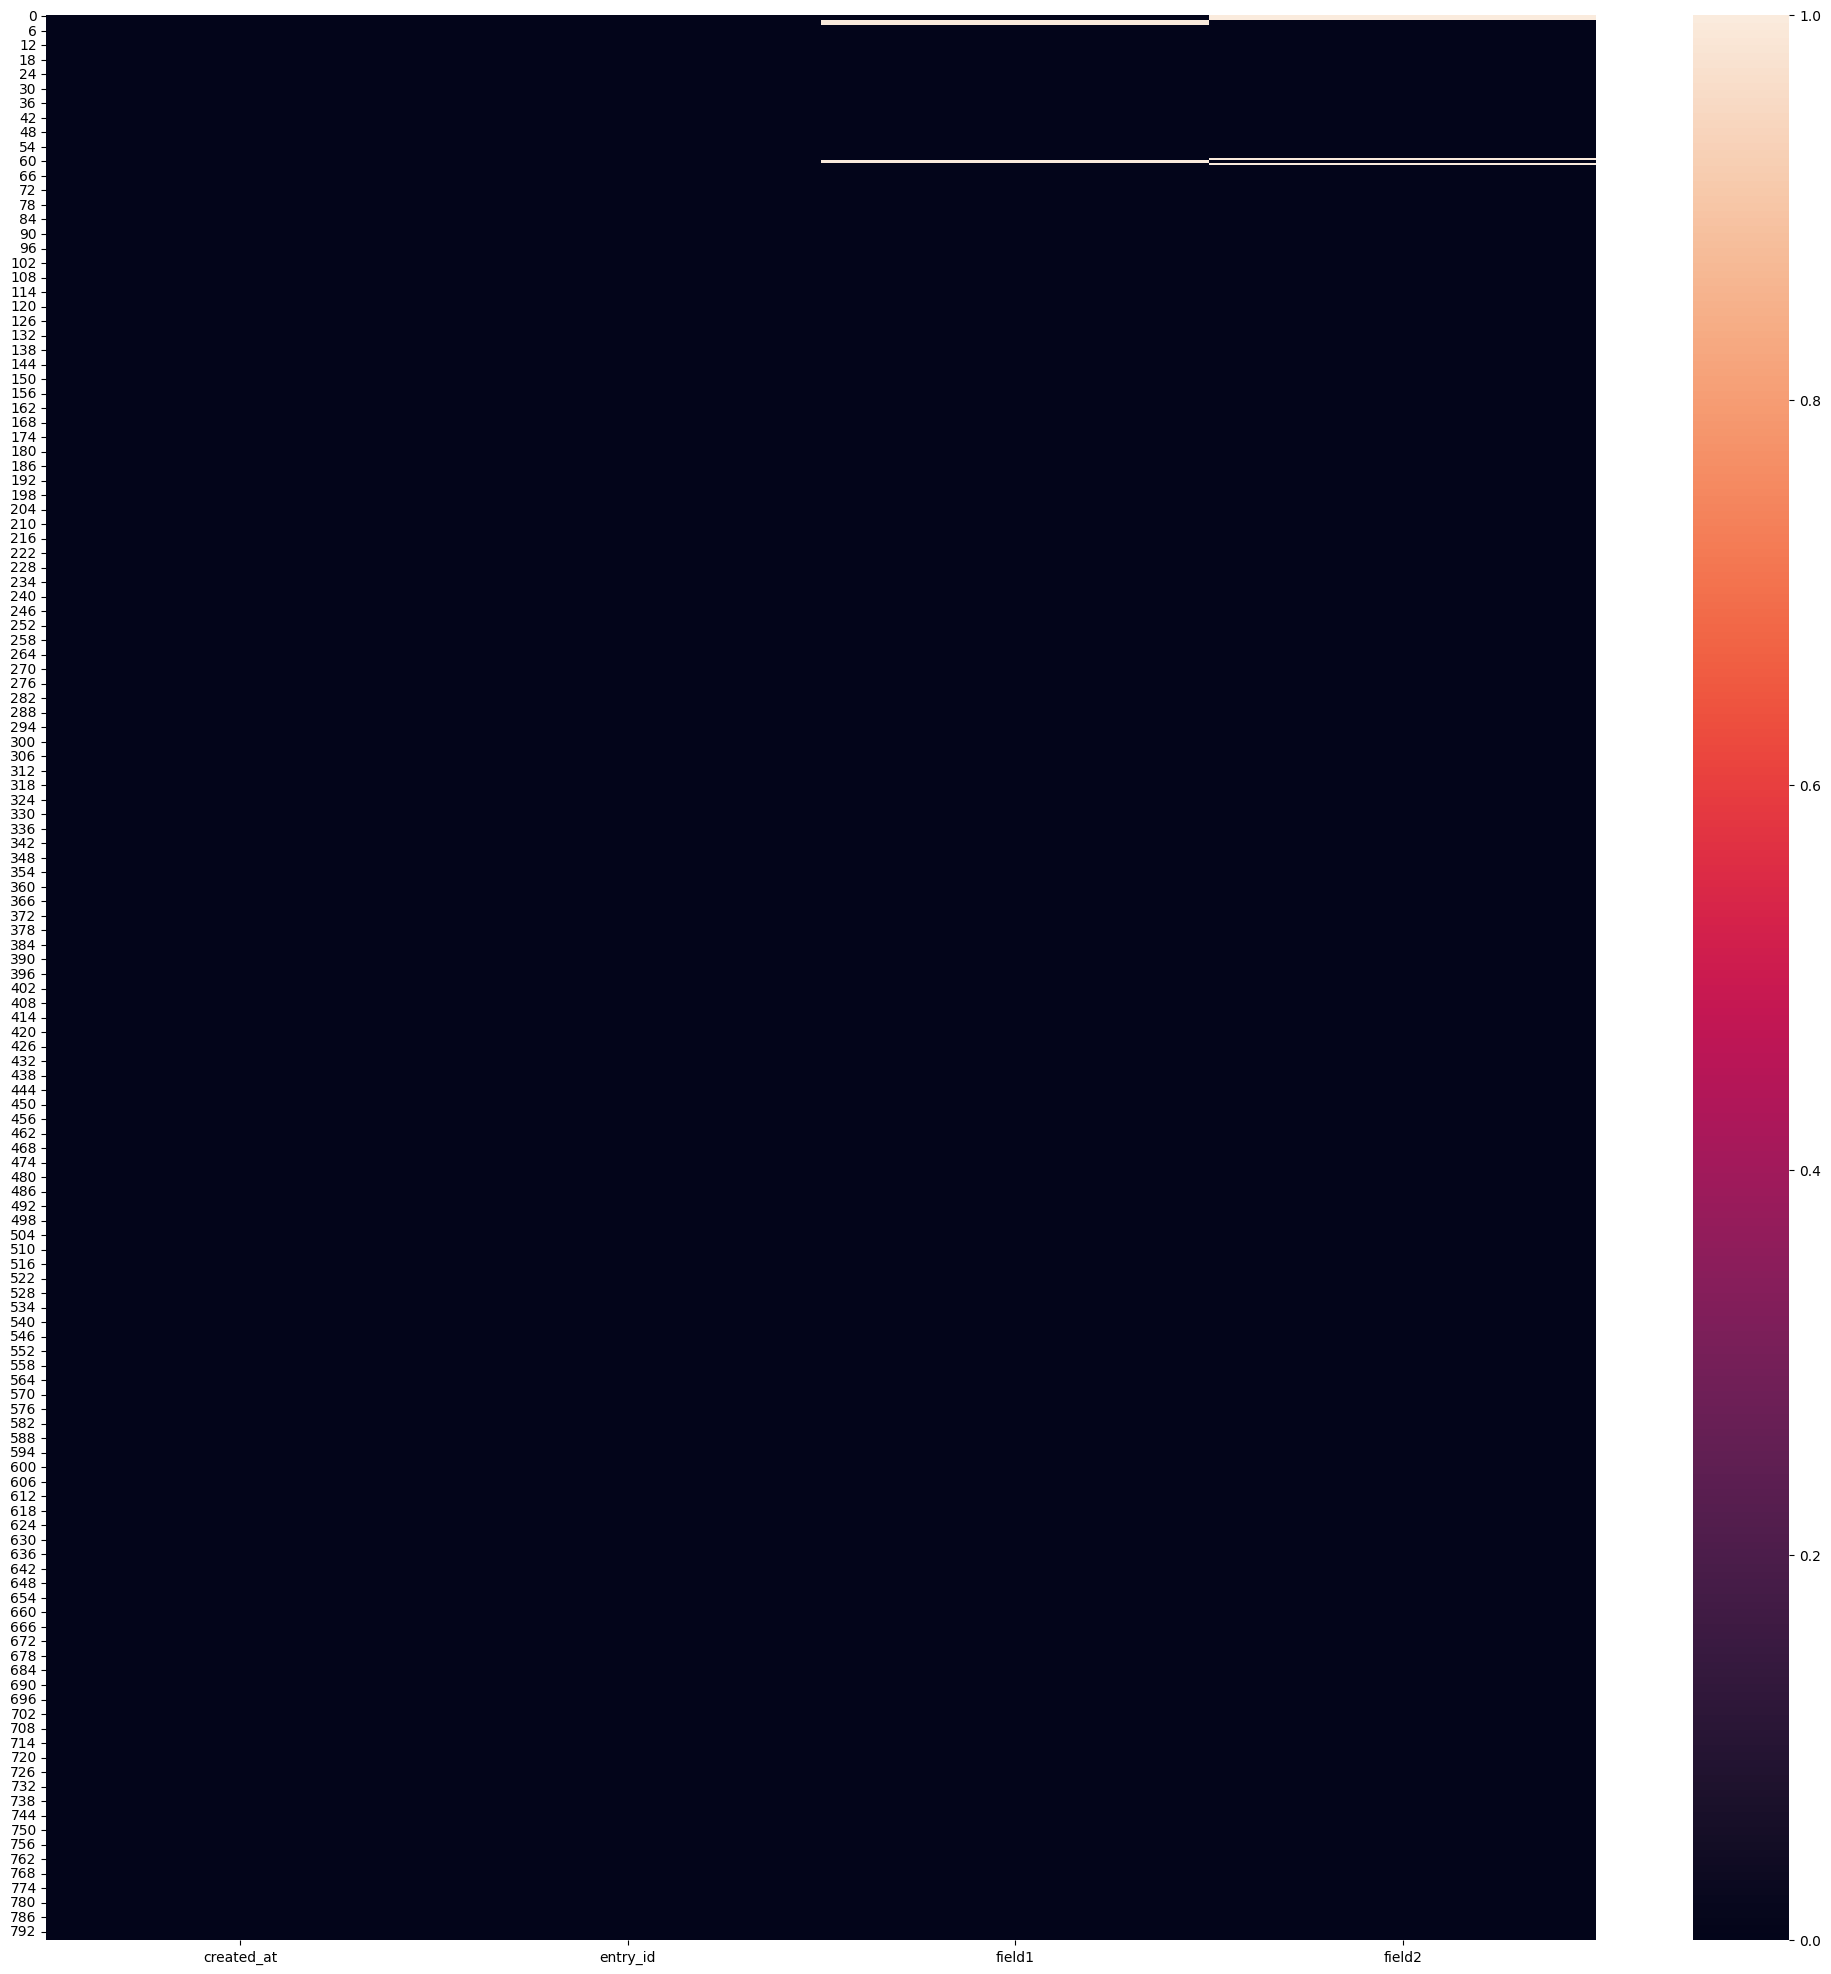

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

In [ ]:
null_var=df.isnull().sum()/df.shape[0] *100
null_var

,0
created_at,0.000000
entry_id,0.000000
field1,0.376884
field2,0.502513


In [ ]:
drop_columns =null_var[null_var >17].keys()
drop_columns

Index([], dtype='object')

In [ ]:
df2_drop_clm=df.drop(columns=drop_columns)

In [ ]:
df2_drop_clm.shape

(796, 4)

<Axes: >

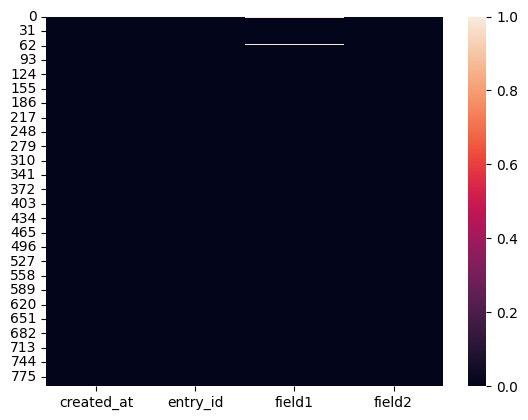

In [ ]:
sns.heatmap(df2_drop_clm.isnull())

In [ ]:
df3_drop_rows=df2_drop_clm.dropna()

In [ ]:
df3_drop_rows.shape

(789, 4)

<Axes: >

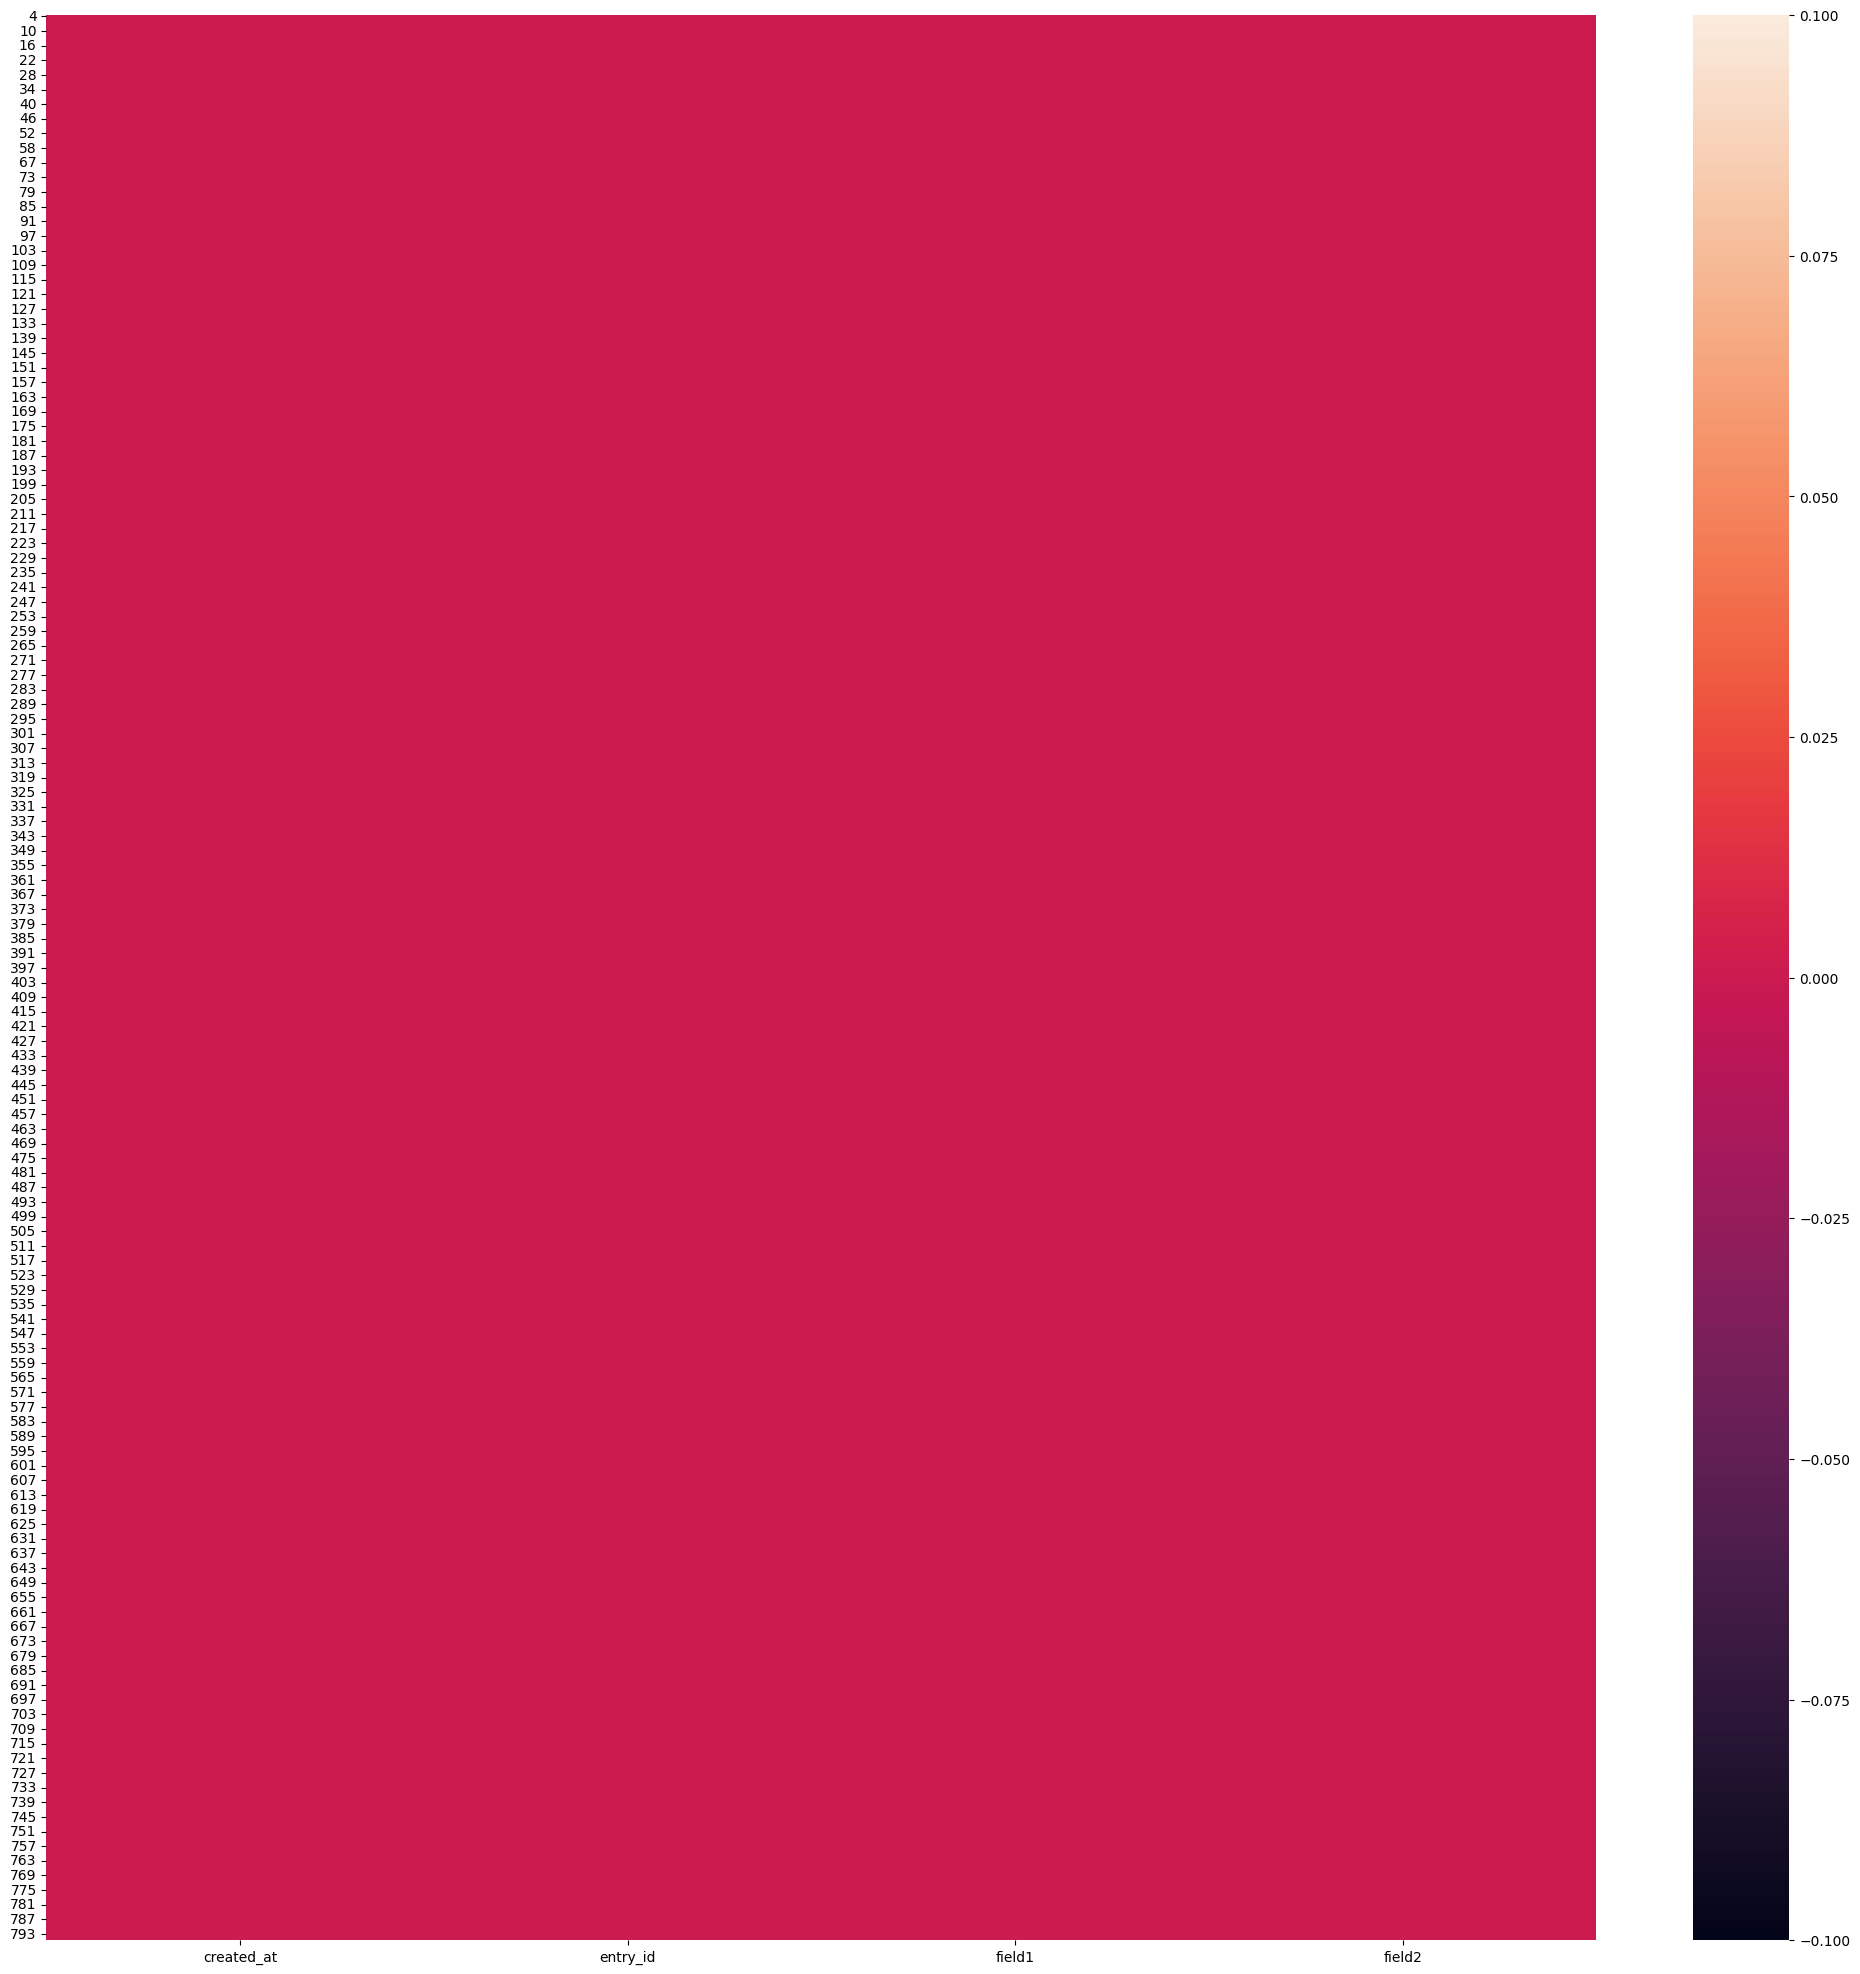

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df3_drop_rows.isnull())

In [ ]:
df3_drop_rows.isnull().sum()

,0
created_at,0
entry_id,0
field1,0
field2,0


In [ ]:
data_cleaned = df3_drop_rows

In [ ]:
# Display basic information and first few rows
print("Cleaned Data Info:")
print(data_cleaned.info())
print("\nFirst Few Rows:")
print(data_cleaned.head())

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 789 entries, 4 to 795
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  789 non-null    object 
 1   entry_id    789 non-null    int64  
 2   field1      789 non-null    float64
 3   field2      789 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 30.8+ KB
None

First Few Rows:
                  created_at  entry_id  field1  field2
4  2024-12-08T19:20:47+00:00         5     0.0     1.0
5  2024-12-08T19:21:08+00:00         6     0.0     1.0
6  2024-12-08T19:21:29+00:00         7     0.0     1.0
7  2024-12-08T19:21:50+00:00         8     0.0     1.0
8  2024-12-08T19:22:11+00:00         9     0.0     1.0


Visualizing Missing Data:


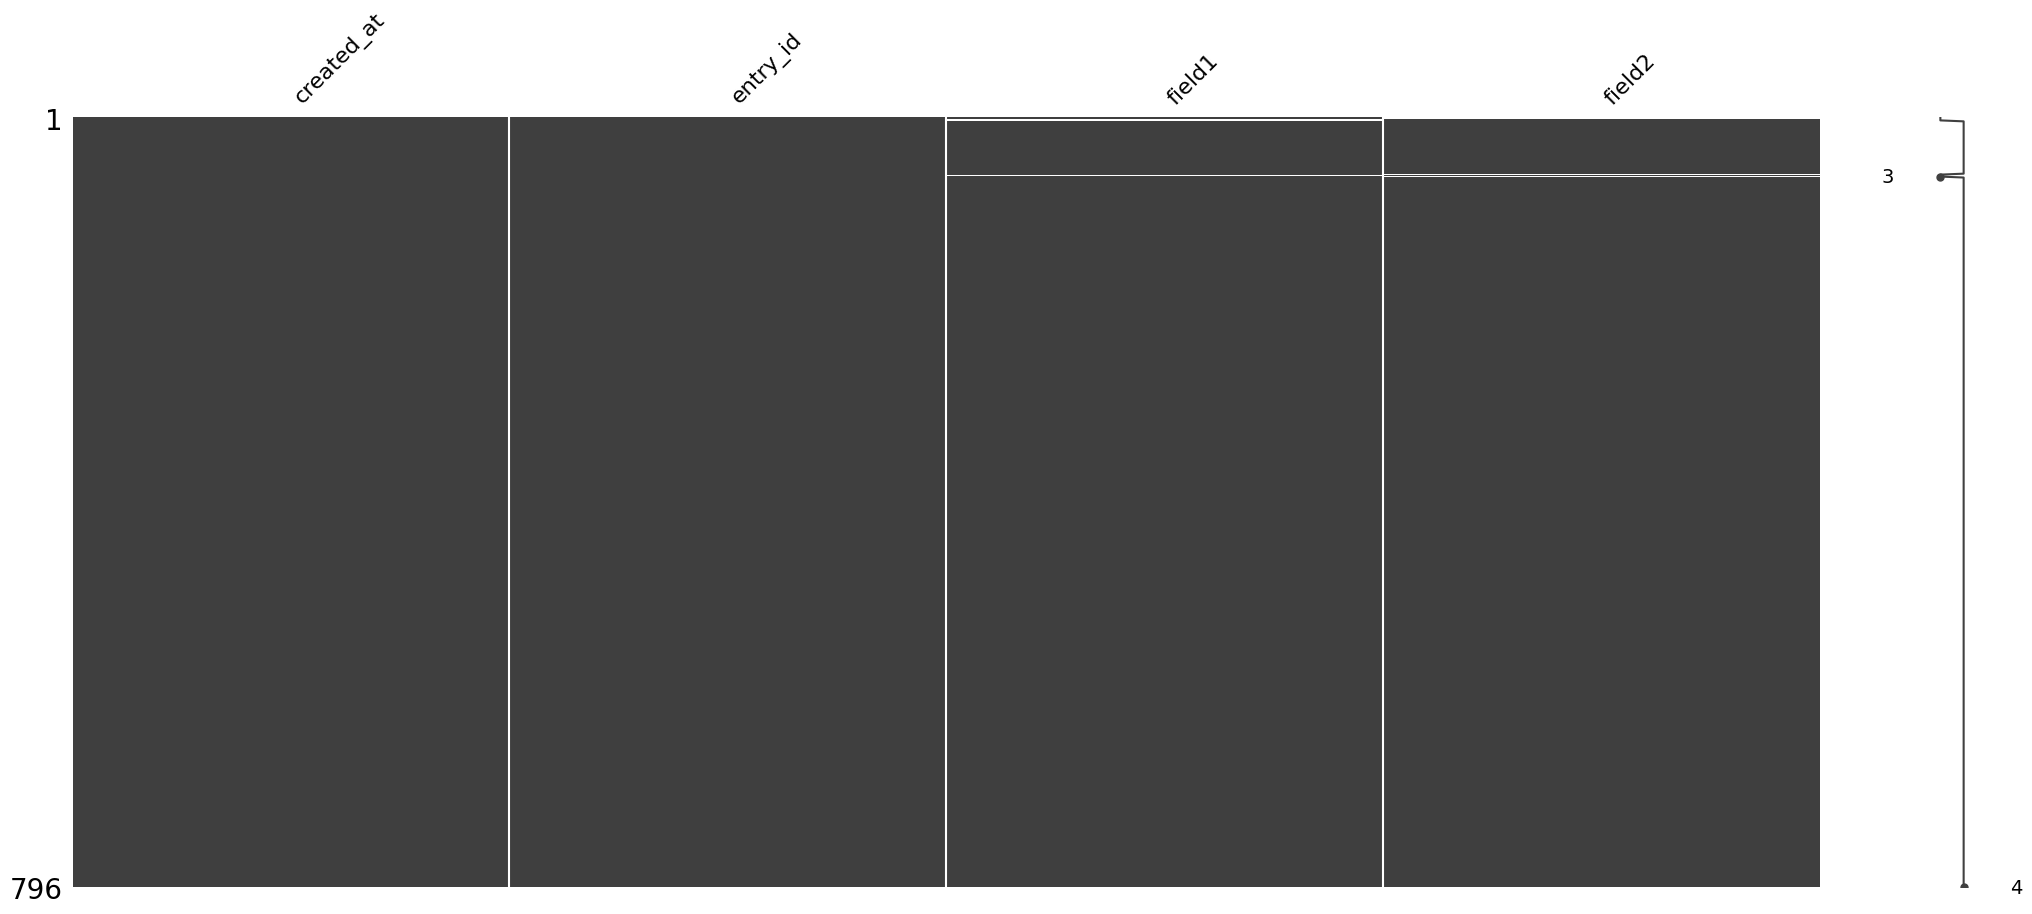

In [ ]:
# 1. Missing Data Visualization
print("Visualizing Missing Data:")
msno.matrix(df)
plt.show()

Time-Series Analysis:


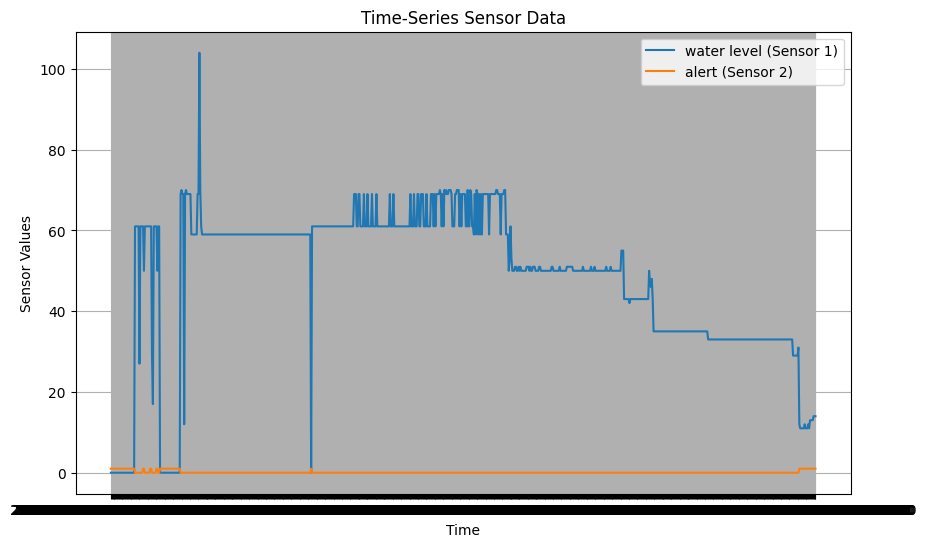

In [ ]:
# Time-Series Analysis
print("Time-Series Analysis:")
plt.figure(figsize=(10, 6))
plt.plot(data_cleaned['created_at'], data_cleaned['field1'], label='water level (Sensor 1)')
plt.plot(data_cleaned['created_at'], data_cleaned['field2'], label='alert (Sensor 2)')
plt.xlabel('Time')
plt.ylabel('Sensor Values')
plt.title('Time-Series Sensor Data')
plt.legend()
plt.grid(True)
plt.show()

Distribution Analysis:


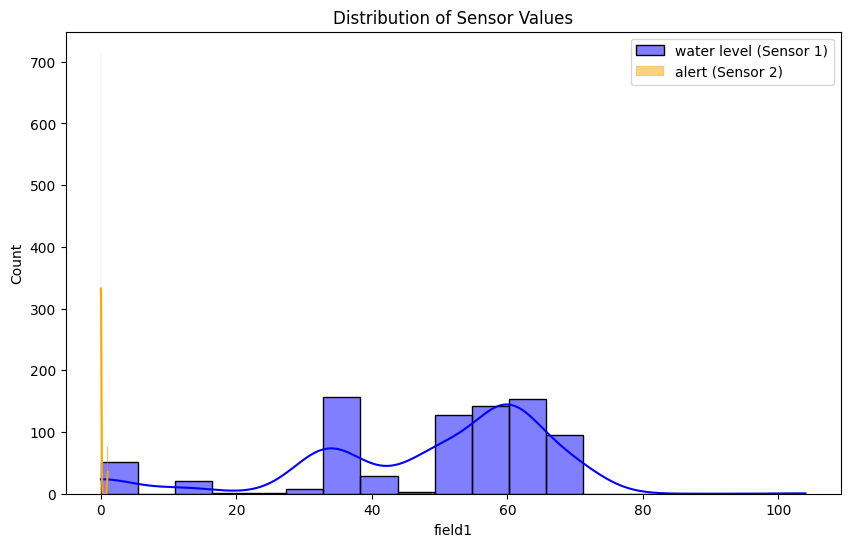

In [ ]:
#  Distribution Analysis
print("Distribution Analysis:")
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['field1'], kde=True, color='blue', label='water level (Sensor 1)')
sns.histplot(data_cleaned['field2'], kde=True, color='orange', label='alert (Sensor 2)')
plt.title('Distribution of Sensor Values')
plt.legend()
plt.show()


Correlation Analysis:


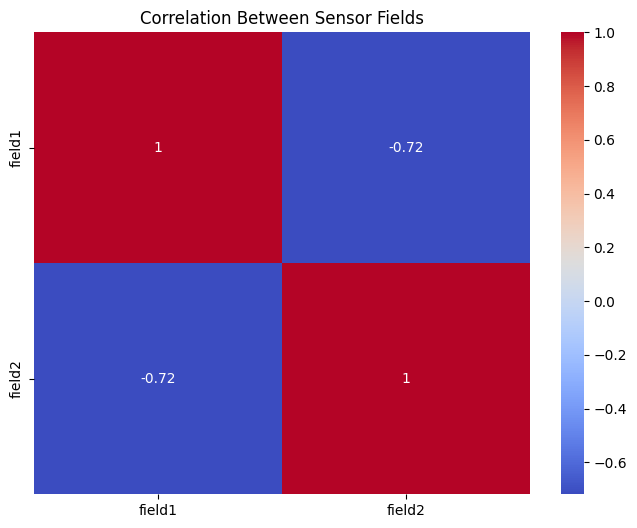

In [ ]:
# 5. Correlation Heatmap
print("Correlation Analysis:")
plt.figure(figsize=(8, 6))
sns.heatmap(data_cleaned[['field1', 'field2']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Sensor Fields')
plt.show()

In [ ]:
# Rolling Averages for Trend Analysis
print("Rolling Averages for Trend Analysis:")
data_cleaned['field1_rolling'] = data_cleaned['field1'].rolling(window=5).mean()
data_cleaned['field2_rolling'] = data_cleaned['field2'].rolling(window=5).mean()

Rolling Averages for Trend Analysis:


<ipython-input-80-86668e1b6a27>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['field1_rolling'] = data_cleaned['field1'].rolling(window=5).mean()
<ipython-input-80-86668e1b6a27>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['field2_rolling'] = data_cleaned['field2'].rolling(window=5).mean()


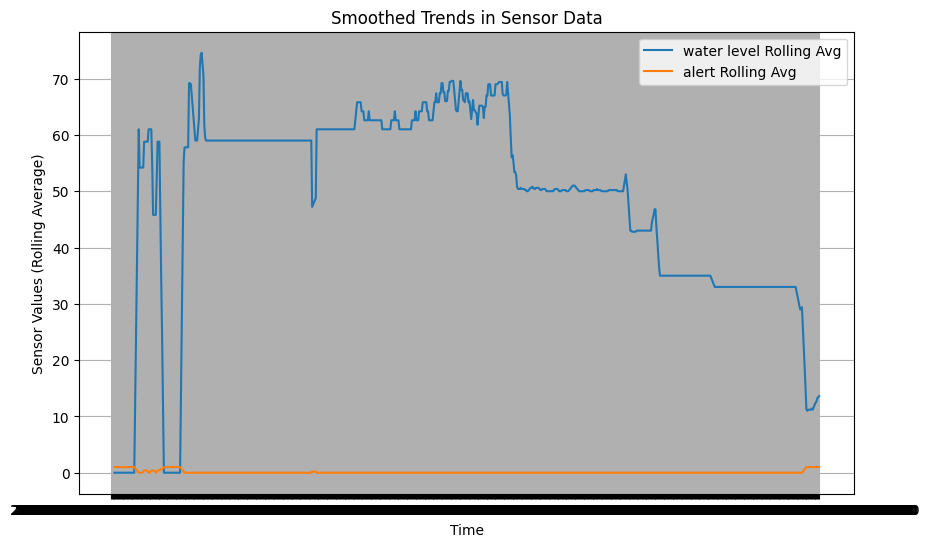

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data_cleaned['created_at'], data_cleaned['field1_rolling'], label='water level Rolling Avg')
plt.plot(data_cleaned['created_at'], data_cleaned['field2_rolling'], label='alert Rolling Avg')
plt.xlabel('Time')
plt.ylabel('Sensor Values (Rolling Average)')
plt.title('Smoothed Trends in Sensor Data')
plt.legend()
plt.grid(True)
plt.show()

Feature Engineering - Rate of Change:


<ipython-input-82-b8cc004f709d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['field1_rate'] = data_cleaned['field1'].diff()
<ipython-input-82-b8cc004f709d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['field2_rate'] = data_cleaned['field2'].diff()


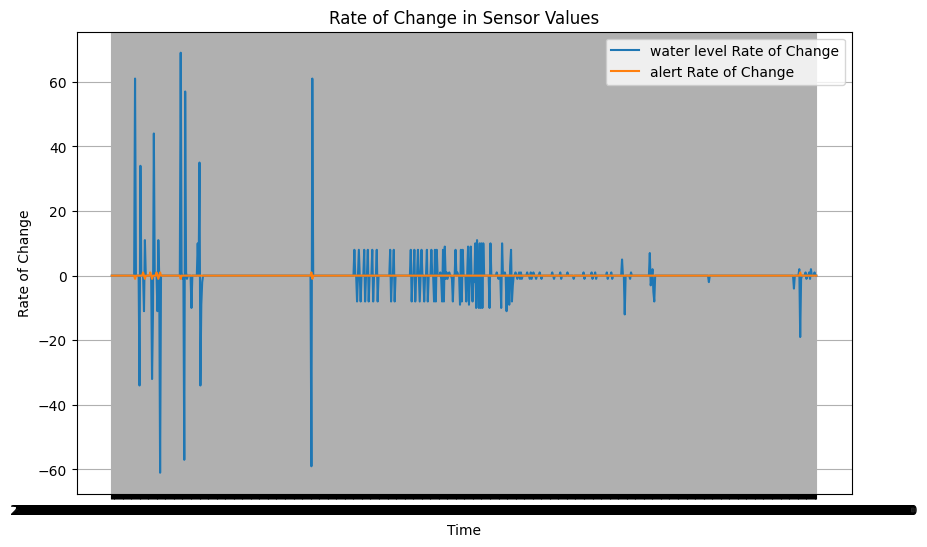

In [ ]:
# Rate of Change (Feature Engineering)
print("Feature Engineering - Rate of Change:")
data_cleaned['field1_rate'] = data_cleaned['field1'].diff()
data_cleaned['field2_rate'] = data_cleaned['field2'].diff()

plt.figure(figsize=(10, 6))
plt.plot(data_cleaned['created_at'], data_cleaned['field1_rate'], label='water level Rate of Change')
plt.plot(data_cleaned['created_at'], data_cleaned['field2_rate'], label='alert Rate of Change')
plt.xlabel('Time')
plt.ylabel('Rate of Change')
plt.title('Rate of Change in Sensor Values')
plt.legend()
plt.grid(True)
plt.show()

Pair Plot for Multivariate Analysis:


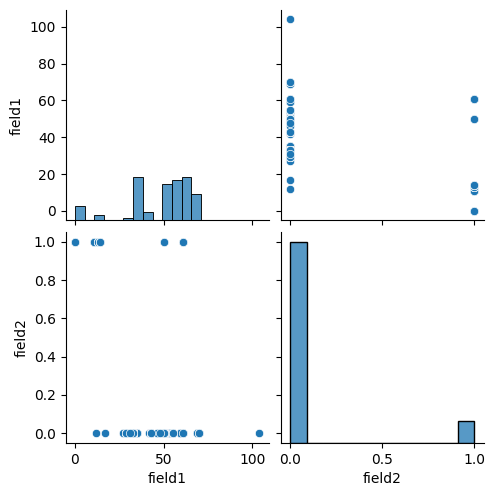

In [ ]:
# Pair Plot for Multivariate Analysis
print("Pair Plot for Multivariate Analysis:")
sns.pairplot(data_cleaned[['field1', 'field2']])
plt.show()